In [10]:
import pandas as pd

from sodapy import Socrata
from timeit import default_timer

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
start = default_timer()

# do stuff
#16385532
results = client.get("pqfs-mqru",limit=1000000)
# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)
duration = default_timer() - start
print(duration/60)

1.0311619226333353


In [11]:
results_df.to_csv('NYC_Taxi_Small.csv', sep='\t', encoding='utf-8')

In [12]:
from geopy.distance import great_circle
pickup_NY = (40.680610656738281, -73.928642272949219)
dropoff_NY = (40.698043823242188, -73.924278259277344)
print(great_circle(pickup_NY, dropoff_NY).meters)

1973.6472373408046


In [13]:
import os
import folium
from folium import plugins
from folium.plugins import HeatMap
m = folium.Map([40.730610, -73.935242], tiles='stamentoner', zoom_start=11)
array = []
for index, row in results_df.iterrows():
    
    val1 =float(row['pickup_latitude'])
    val2 =float(row['pickup_longitude'])
    val3 =1
    
    array.append([val1, val2, val3])
    #print (array)
    #folium.Marker([val1, val2], popup=str(Aantal)).add_to(m)
    #print(key, ':', l[key][0], l[key][1], l[key][2])
    
HeatMap(array).add_to(m)
# I am using the magnitude as the weight for the heatmap
#print(array
m

KeyboardInterrupt: 

# Yellow Cabs

In [14]:
client = Socrata("data.cityofnewyork.us", "mInZoLergBidZkJY82xc7FYke")

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
start = default_timer()

# do stuff
#131165043
results = client.get("uacg-pexx",limit=1000000)
# Convert to pandas DataFrame
results_dfYellow = pd.DataFrame.from_records(results)
duration = default_timer() - start
print(duration/60)

0.8134925374333383


In [15]:
payments=results_df.payment_type
paymentsDetailGreen=[]
cash=[]
credit=[]
noCharge=[]
dispute=[]
unknown=[]
voidedTrip=[]
for x in payments:
    
    if x=='1':
        credit.append(x) 
    elif x=='2':
        cash.append(x)
    elif x=='3':
        noCharge.append(x)
    elif x=='4':
        dispute.append(x)
    elif x=='5':
        unknown.append(x)        
    else:
        voidedTrip.append(x)
paymentsDetailGreen.extend((len(cash),len(credit),len(noCharge),len(dispute),len(unknown),len(voidedTrip)))        
#print('Credit card payments: %s' %(len(credit)))
#print('Cash card payments: %s'%(len(cash)))
#print('No Charge: %s'%(len(noCharge)))
#print('Dispute payments: %s'%(len(dispute)))
#print('Unknown payments: %s'%(len(unknown)))
#print('Voided Trips: %s'%(len(voidedTrip)))
paymentsY=results_dfYellow.payment_type
paymentsDetailYellow=[]
cashY=[]
creditY=[]
noChargeY=[]
disputeY=[]
unknownY=[]
voidedTripY=[]
for y in paymentsY:
    
    if y=='1':
        creditY.append(y) 
    elif y=='2':
        cashY.append(y)
    elif y=='3':
        noChargeY.append(y)
    elif y=='4':
        disputeY.append(y)
    elif y=='5':
        unknownY.append(y)        
    else:
        voidedTripY.append(y)

paymentsDetailYellow.extend((len(cashY),len(creditY),len(noChargeY),len(disputeY),len(unknownY),len(voidedTripY)))
print(paymentsDetailYellow)
print(paymentsDetailGreen)

[344538, 649503, 4541, 1418, 0, 0]
[502219, 490332, 4260, 3116, 73, 0]


[502219, 490332]


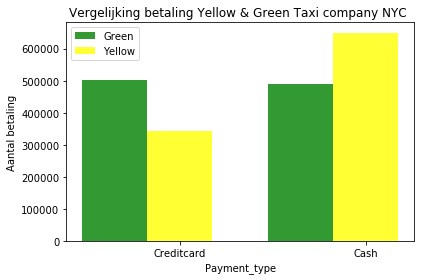

In [16]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 2
payGreen = []
payGreen.extend((paymentsDetailGreen[0],paymentsDetailGreen[1]))
payYellow = []
payYellow.extend((paymentsDetailYellow[0],paymentsDetailYellow[1]))
print(payGreen)
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, payGreen, bar_width,
                 alpha=opacity,
                 color='green',
                 label='Green')
 
rects2 = plt.bar(index + bar_width, payYellow, bar_width,
                 alpha=opacity,
                 color='yellow',
                 label='Yellow')
#,'No Charge','Dispute','Unknown','Voided trip'
plt.ylabel('Aantal betaling')
plt.title('Vergelijking betaling Yellow & Green Taxi company NYC ')
plt.xlabel('Payment_type')
x_axis=['Creditcard','Cash']
plt.xticks(index+bar_width,x_axis)
plt.legend()
 
plt.tight_layout()
plt.show()

[4260, 3116, 73, 0]
[4541, 1418, 0, 0]


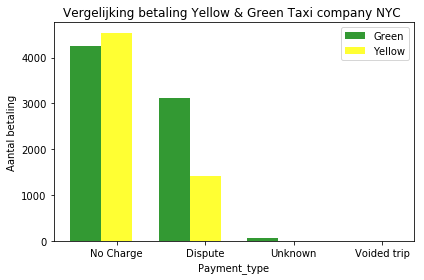

In [17]:
# data to plot
n_groups = 4
payGreen = []
payGreen.extend((paymentsDetailGreen[2],paymentsDetailGreen[3],paymentsDetailGreen[4],paymentsDetailGreen[5]))
payYellow = []
payYellow.extend((paymentsDetailYellow[2],paymentsDetailYellow[3],paymentsDetailYellow[4],paymentsDetailYellow[5]))

print(payGreen)
print(payYellow)
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, payGreen, bar_width,
                 alpha=opacity,
                 color='green',
                 label='Green')
 
rects2 = plt.bar(index + bar_width, payYellow, bar_width,
                 alpha=opacity,
                 color='yellow',
                 label='Yellow')
#,'No Charge','Dispute','Unknown','Voided trip'
plt.ylabel('Aantal betaling')
plt.title('Vergelijking betaling Yellow & Green Taxi company NYC ')
plt.xlabel('Payment_type')
x_axis=['No Charge','Dispute','Unknown','Voided trip']
plt.xticks(index+bar_width,x_axis)
plt.legend()
 
plt.tight_layout()
plt.show()

In [2]:
import os
import folium
print(folium.__version__)
import json
us_states = os.path.join('/Users/thomasleysen/Documents/folium/examples/data', 'boroughs.json')
geo_json_data = json.load(open(us_states))
m = folium.Map([40.73061040, -73.935242], zoom_start=4)
with open(us_states) as f:
    adminlevel6 = json.load(f)
for item in adminlevel6['features']:
    folium.GeoJson(item['geometry']).add_to(m)
m.save(os.path.join('/Users/thomasleysen/Documents/folium/examples/results', 'GeoJSON_and_choropleth_1.html'))
m 

0.5.0
